In [37]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [22]:
# Load the NetCDF file
file_path = 'GPCPMON_L3_202301_V3.2.nc4'
dataset = xr.open_dataset(file_path)

# Print the dataset to see its structure
print(dataset)

<xarray.Dataset>
Dimensions:                   (lon: 720, lat: 360, time: 1, bnds: 2)
Coordinates:
  * lon                       (lon) float32 -179.8 -179.2 -178.8 ... 179.2 179.8
  * lat                       (lat) float32 89.75 89.25 88.75 ... -89.25 -89.75
  * time                      (time) datetime64[ns] 2023-01-01
Dimensions without coordinates: bnds
Data variables:
    sat_gauge_precip          (time, lat, lon) float32 ...
    sat_gauge_error           (time, lat, lon) float32 ...
    satellite_precip          (time, lat, lon) float32 ...
    satellite_source          (time, lat, lon) float32 ...
    gauge_precip              (time, lat, lon) float32 ...
    probability_liquid_phase  (time, lat, lon) float32 ...
    gauge_relative_weight     (time, lat, lon) float32 ...
    quality_index             (time, lat, lon) float32 ...
    time_bnds                 (time, bnds) datetime64[ns] ...
Attributes: (12/66)
    ShortName:                      GPCPMON
    LongName:             

In [23]:
# Print the names of all variables in the dataset
print(dataset.data_vars)

Data variables:
    sat_gauge_precip          (time, lat, lon) float32 ...
    sat_gauge_error           (time, lat, lon) float32 ...
    satellite_precip          (time, lat, lon) float32 ...
    satellite_source          (time, lat, lon) float32 ...
    gauge_precip              (time, lat, lon) float32 ...
    probability_liquid_phase  (time, lat, lon) float32 ...
    gauge_relative_weight     (time, lat, lon) float32 ...
    quality_index             (time, lat, lon) float32 ...
    time_bnds                 (time, bnds) datetime64[ns] ...


In [24]:
# Print the dimensions of the dataset
print(dataset.dims)

Frozen({'lon': 720, 'lat': 360, 'time': 1, 'bnds': 2})


In [63]:
unique_attributes = dataset.attrs.keys()

# Printing the unique attributes
print("Unique Attributes:")
for attr in unique_attributes:
    print(attr)

Unique Attributes:
ShortName
LongName
VersionID
GranuleID
Format
RangeBeginningDate
RangeBeginningTime
RangeEndingDate
RangeEndingTime
ProductionDateTime
Conventions
NorthernmostLatitude
SouthernmostLatitude
WesternmostLongitude
EasternmostLongitude
LatitudeResolution
LongitudeResolution
Entry_ID
Entry_Title
Title
Science_Keywords
ISO_Topic_Category
Data_Center_ShortName
Data_Center_LongName
Data_Center_URL
Data_Center_Role
Data_Center_Last_Name
Data_Center_Email
Data_Center_Phone
Data_Center_Fax
Data_Center_Address
Data_Set_Progress
DataSetQuality
Summary
Validation_Data
Source
MapProjection
RelatedURL
Dataset_Creator
Dataset_Title
Dataset_Series_Name
Dataset_Release_Date
Dataset_Release_Place
Dataset_Publisher
IdentifierProductDOI
Data_Presentation_Form
References
Role
First_Name
Last_Name
Phone
FAX
Email
Contact_Address
City
Provence_or_State
Postal_Code
Country
Use_Constraints
Distribution_Media
Distribution_Size
Distribution_Format
IdentifierProductDOIAuthority
Fees
ProcessingLeve

In [65]:
print("Attributes:")
for attr, value in dataset.attrs.items():
    print(f"{attr}: {value}")

Attributes:
ShortName: GPCPMON
LongName: GPCP Precipitation Level 3 Monthly 0.5-Degree V3.2
VersionID: 3.2
GranuleID: GPCPMON_L3_202301_V3.2.nc4
Format: NetCDF-4
RangeBeginningDate: 2023-01-01
RangeBeginningTime: 00:00:00.000000
RangeEndingDate: 2023-01-31
RangeEndingTime: 23:59:59.999999
ProductionDateTime: 2023-07-25T14:08:00Z
Conventions: CF-1.5
NorthernmostLatitude: 90.0
SouthernmostLatitude: -90.0
WesternmostLongitude: -180.0
EasternmostLongitude: 180.0
LatitudeResolution: 0.5
LongitudeResolution: 0.5
Entry_ID: GPCPMON_3.2
Entry_Title: GPCP Precipitation Level 3 Monthly 0.5-Degree V3.2 (GPCPMON) at GES DISC
Title: GPCP Precipitation Level 3 Monthly 0.5-Degree V3.2
Science_Keywords: EARTH SCIENCE > ATMOSPHERE > PRECIPITATION > PRECIPITATION RATE
ISO_Topic_Category: Climatology/Meteorology/Atmosphere
Data_Center_ShortName: NASA/GSFC/SED/ESD/GCDC/GESDISC
Data_Center_LongName: Goddard Earth Sciences Data and Information Services Center (formerly Goddard DAAC),Global Change Data Center

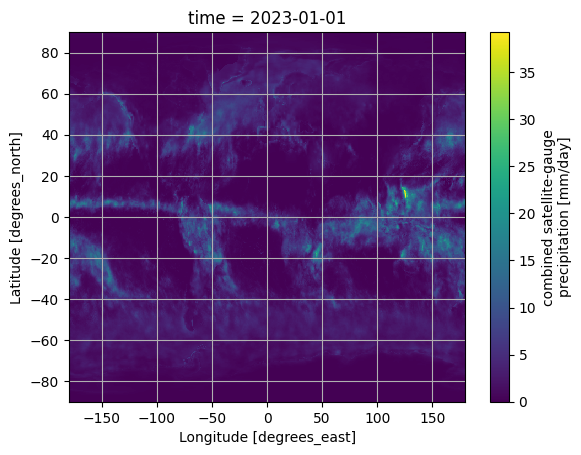

In [76]:
# Access a specific variable (e.g., precipitation)
sat_gauge_precip = dataset['sat_gauge_precip'].isel(time=0)
sat_gauge_precip.plot()
plt.grid(True)
plt.show()

In [77]:
# Print information about the variable
print(sat_gauge_precip)

# Print the first few values of the variable
print(sat_gauge_precip.values)

<xarray.DataArray 'sat_gauge_precip' (lat: 360, lon: 720)>
array([[0.470537, 0.470537, 0.470537, ..., 0.470537, 0.470537, 0.470537],
       [0.466097, 0.466097, 0.466097, ..., 0.466097, 0.466097, 0.466097],
       [0.372122, 0.372122, 0.372122, ..., 0.372122, 0.372122, 0.372122],
       ...,
       [0.008235, 0.008235, 0.008235, ..., 0.008235, 0.008235, 0.008235],
       [0.018416, 0.018416, 0.018416, ..., 0.018416, 0.018416, 0.018416],
       [0.015504, 0.015504, 0.015504, ..., 0.015504, 0.015504, 0.015504]],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
    time     datetime64[ns] 2023-01-01
Attributes:
    units:         mm/day
    long_name:     combined satellite-gauge precipitation
    valid_range:   [  0. 100.]
    cell_methods:  time: mean
[[0.47053713 0.47053713 0.47053713 ... 0.47053713 0.47053713 0.47053713]
 [0.46609715 0.46609715 0.46

In [78]:
# Print the first few values of the variable
print(sat_gauge_precip.values)

[[0.47053713 0.47053713 0.47053713 ... 0.47053713 0.47053713 0.47053713]
 [0.46609715 0.46609715 0.46609715 ... 0.46609715 0.46609715 0.46609715]
 [0.37212244 0.37212244 0.37212244 ... 0.37212244 0.37212244 0.37212244]
 ...
 [0.00823454 0.00823454 0.00823454 ... 0.00823454 0.00823454 0.00823454]
 [0.01841649 0.01841649 0.01841649 ... 0.01841649 0.01841649 0.01841649]
 [0.01550421 0.01550421 0.01550421 ... 0.01550421 0.01550421 0.01550421]]


In [67]:
print(dataset.dims['time'])

1


In [68]:
# Plot satellite-gauge combined precipitation
sat_gauge_precip = dataset['sat_gauge_precip'].isel(time=0)  # Select the first time index
sat_gauge_precip.plot(cmap='Blues', figsize=(12, 6))
plt.title('Satellite-Gauge Combined Precipitation')
plt.show()

IndexError: index 1 is out of bounds for axis 0 with size 1

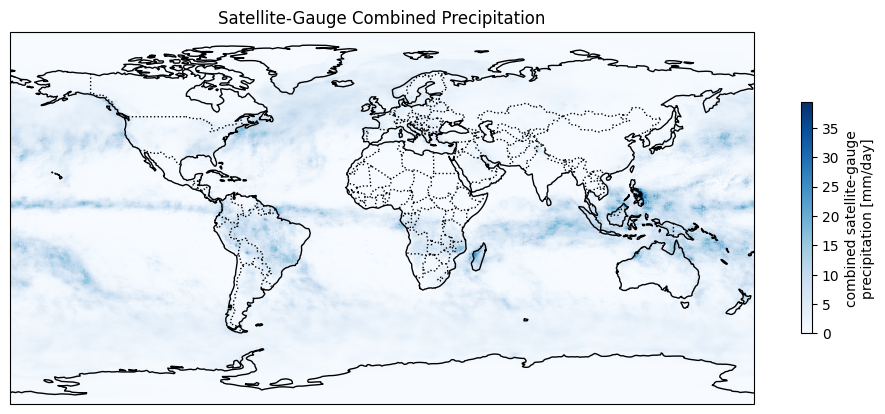

In [38]:
# Plot with map projection
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})
sat_gauge_precip.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Blues', cbar_kwargs={'shrink': 0.5})
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title('Satellite-Gauge Combined Precipitation')
plt.show()

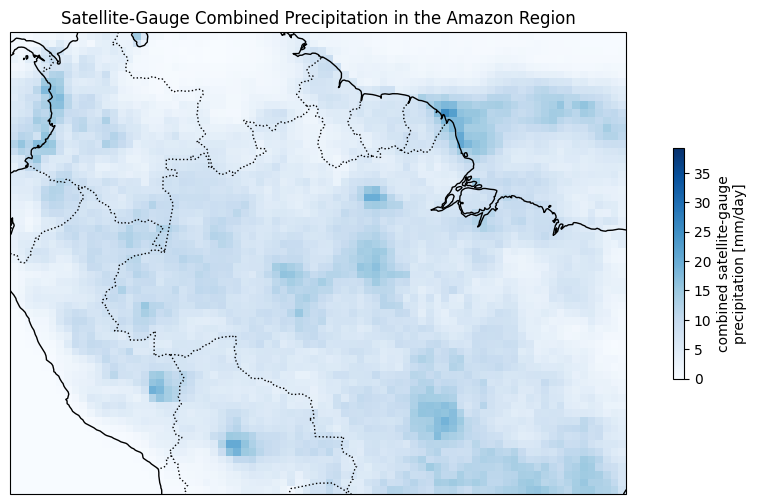

In [45]:
# Plot with map projection and focus on the Amazon region
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})
sat_gauge_precip.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Blues', cbar_kwargs={'shrink': 0.5})
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_extent([-80, -40, -20, 10], crs=ccrs.PlateCarree())
ax.set_title('Satellite-Gauge Combined Precipitation in the Amazon Region')
plt.show()

- **Global Map of Precipitation Error**

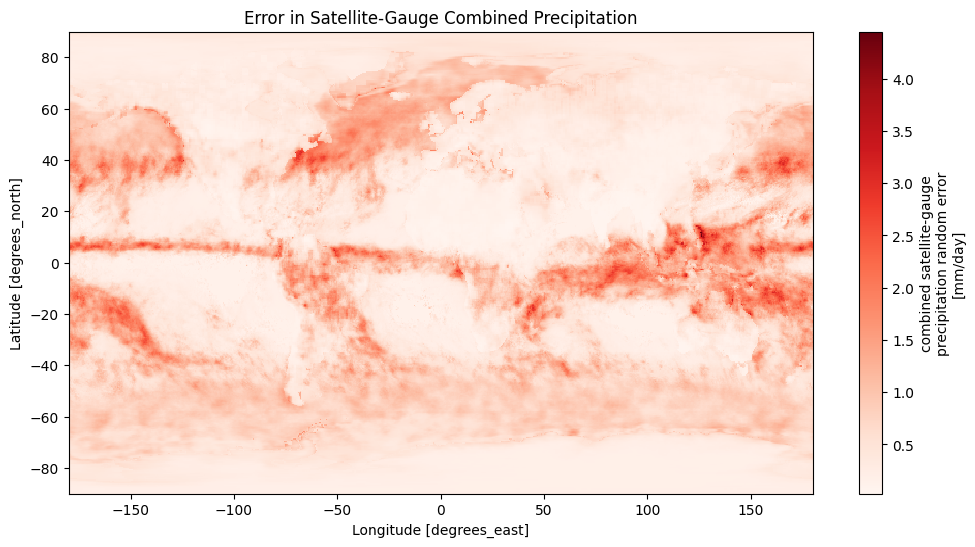

In [29]:
# Plot the error in satellite-gauge combined precipitation
sat_gauge_error = dataset['sat_gauge_error'].isel(time=0)  # Select the first time index
sat_gauge_error.plot(cmap='Reds', figsize=(12, 6))
plt.title('Error in Satellite-Gauge Combined Precipitation')
plt.show()

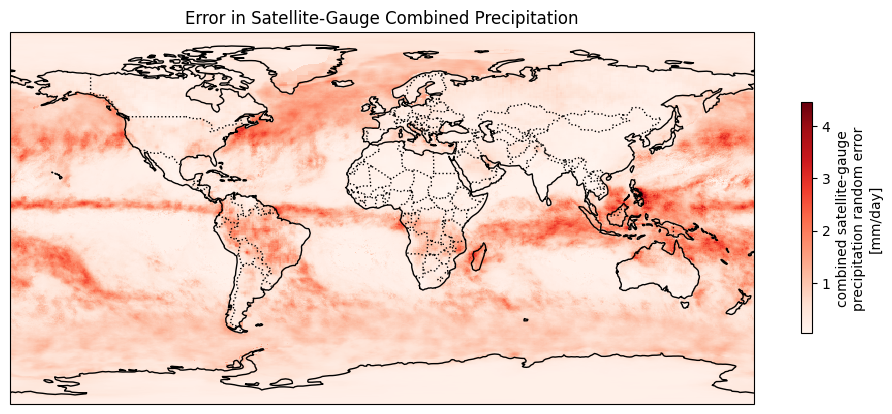

In [41]:
# Plot with map projection
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})
sat_gauge_error.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds', cbar_kwargs={'shrink': 0.5})
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title('Error in Satellite-Gauge Combined Precipitation')
plt.show()

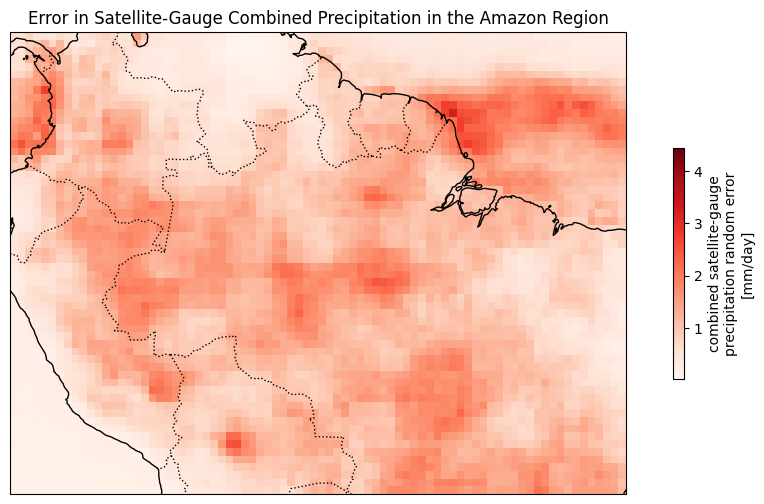

In [46]:
# Plot with map projection and focus on the Amazon region
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})
sat_gauge_error.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds', cbar_kwargs={'shrink': 0.5})
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_extent([-80, -40, -20, 10], crs=ccrs.PlateCarree())
ax.set_title('Error in Satellite-Gauge Combined Precipitation in the Amazon Region')
plt.show()

- **Global Map of Satellite-Only Precipitation**

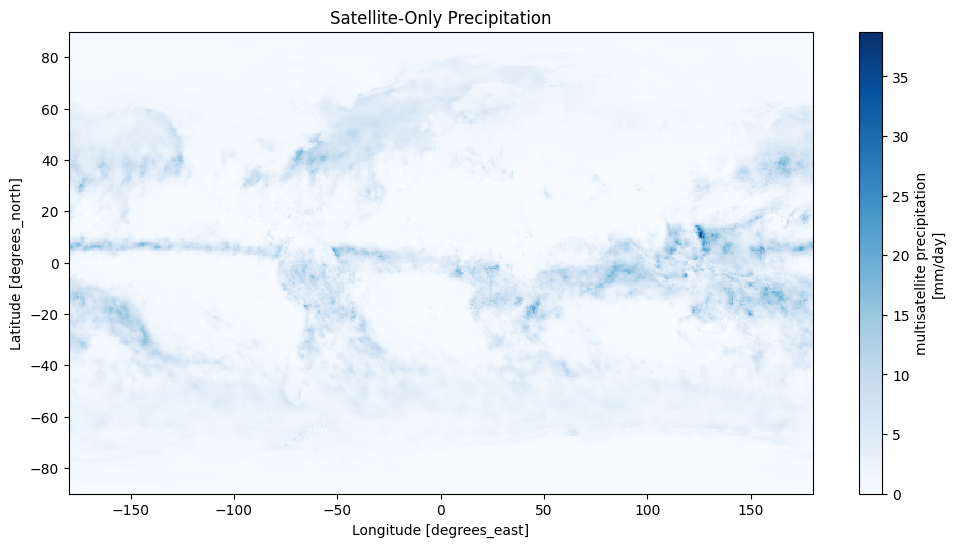

In [33]:
# Plot satellite-only precipitation
satellite_precip = dataset['satellite_precip'].isel(time=0)  # Select the first time index
satellite_precip.plot(cmap='Blues', figsize=(12, 6))
plt.title('Satellite-Only Precipitation')
plt.show()

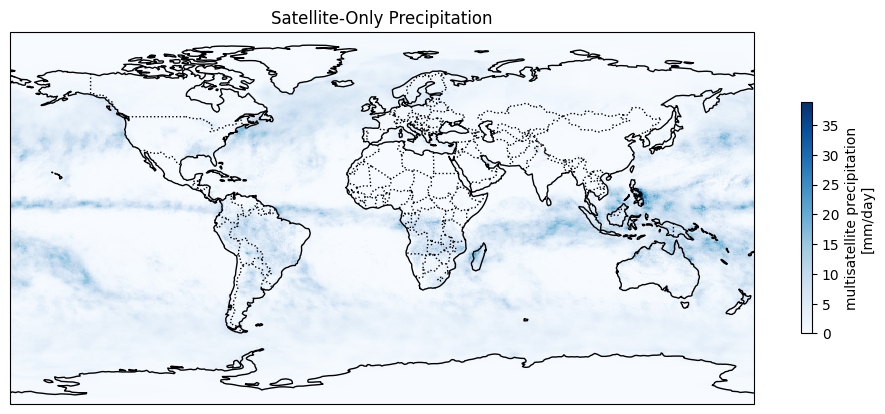

In [42]:
# Plot with map projection
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})
satellite_precip.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Blues', cbar_kwargs={'shrink': 0.5})
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title('Satellite-Only Precipitation')
plt.show()

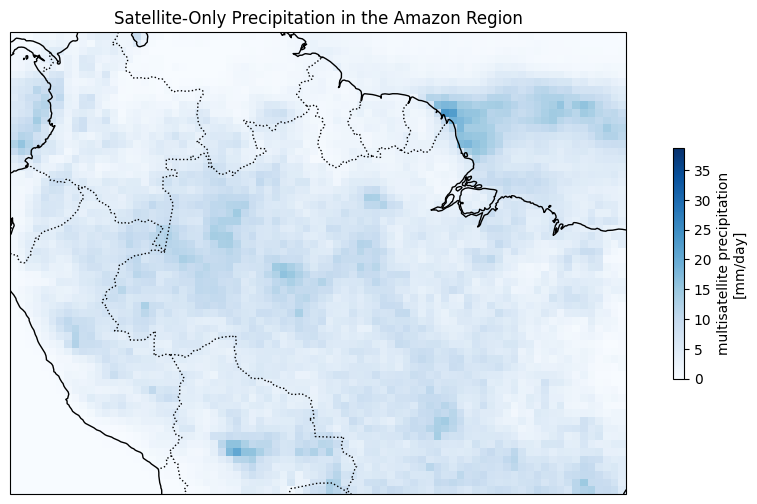

In [47]:
# Plot with map projection and focus on the Amazon region
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})
satellite_precip.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Blues', cbar_kwargs={'shrink': 0.5})
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_extent([-80, -40, -20, 10], crs=ccrs.PlateCarree())
ax.set_title('Satellite-Only Precipitation in the Amazon Region')
plt.show()

- **Global Map of Probability of Liquid Phase Precipitation**

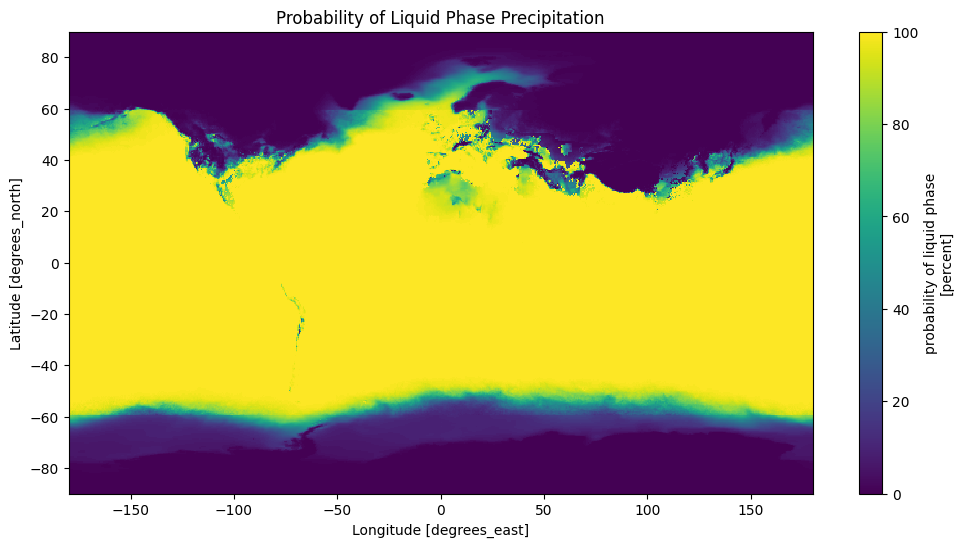

In [34]:
# Plot the probability of liquid phase precipitation
prob_liquid_phase = dataset['probability_liquid_phase'].isel(time=0)  # Select the first time index
prob_liquid_phase.plot(cmap='viridis', figsize=(12, 6))
plt.title('Probability of Liquid Phase Precipitation')
plt.show()

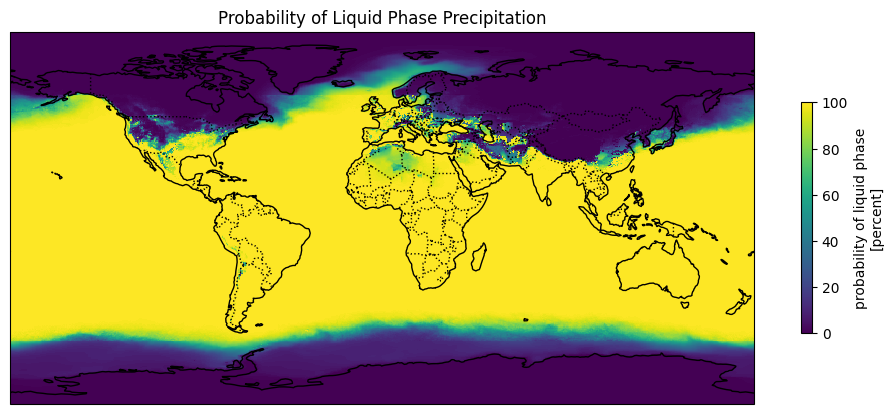

In [43]:
# Plot with map projection
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})
prob_liquid_phase.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', cbar_kwargs={'shrink': 0.5})
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title('Probability of Liquid Phase Precipitation')
plt.show()

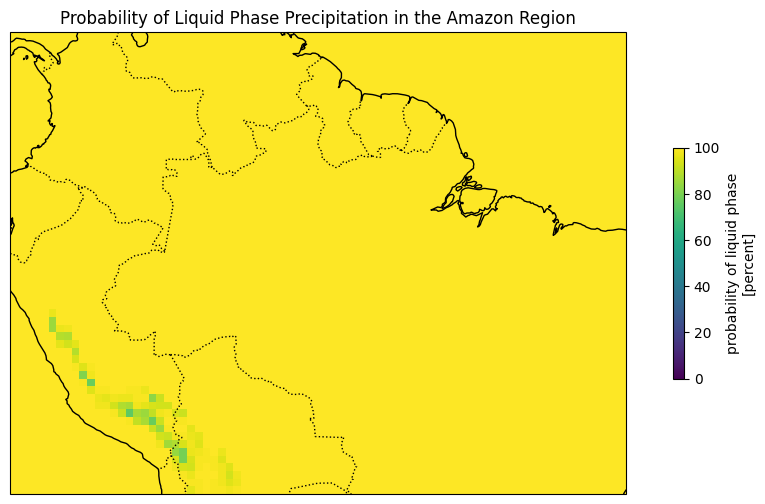

In [48]:
# Plot with map projection and focus on the Amazon region
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})
prob_liquid_phase.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', cbar_kwargs={'shrink': 0.5})
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_extent([-80, -40, -20, 10], crs=ccrs.PlateCarree())
ax.set_title('Probability of Liquid Phase Precipitation in the Amazon Region')
plt.show()

- **Global Map of Quality Index**

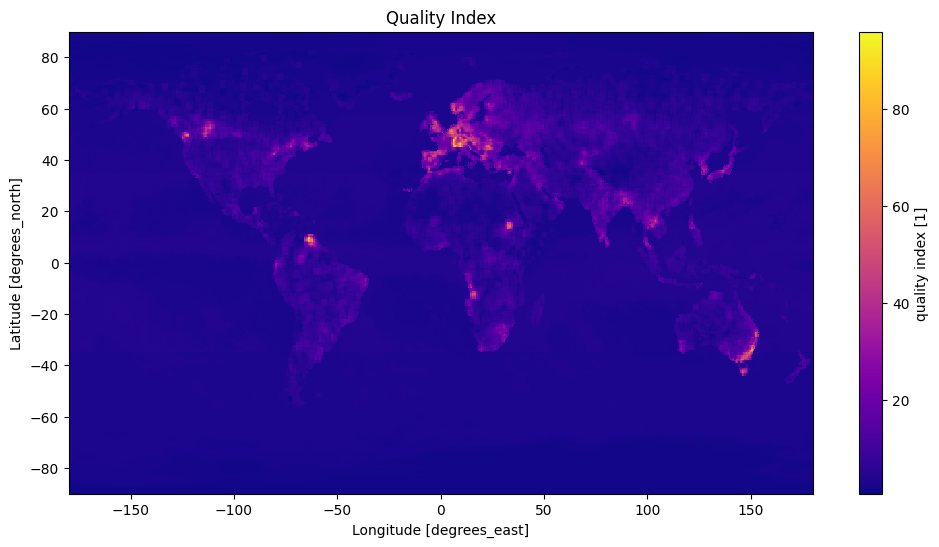

In [35]:
# Plot the quality index of the data
quality_index = dataset['quality_index'].isel(time=0)  # Select the first time index
quality_index.plot(cmap='plasma', figsize=(12, 6))
plt.title('Quality Index')
plt.show()

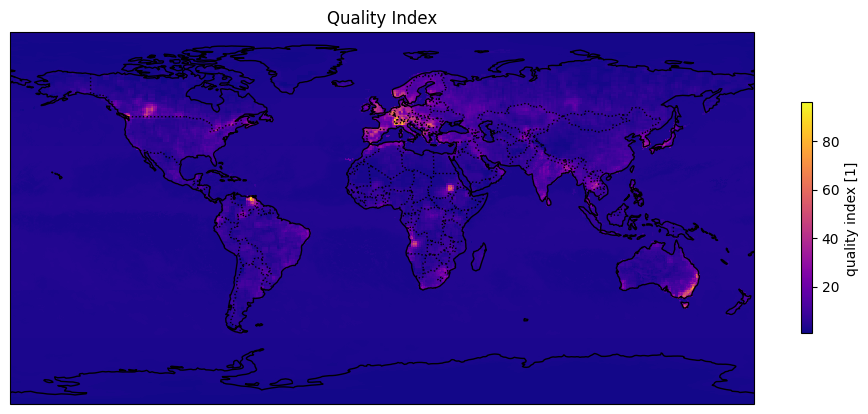

In [44]:
# Plot with map projection
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})
quality_index.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='plasma', cbar_kwargs={'shrink': 0.5})
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title('Quality Index')
plt.show()

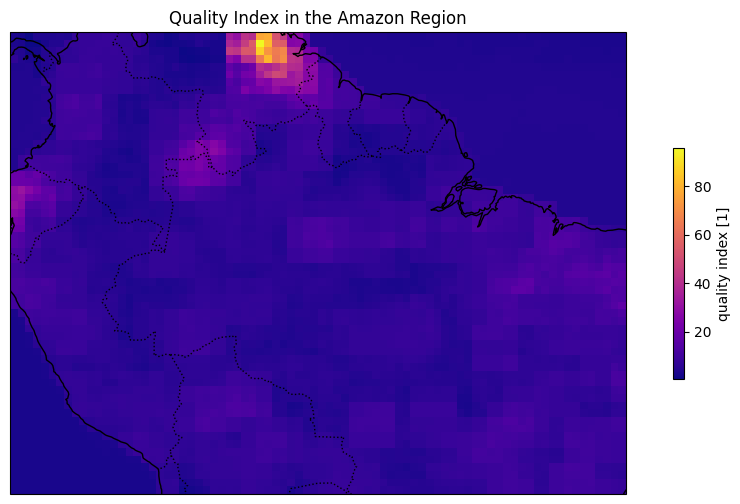

In [49]:
# Plot with map projection and focus on the Amazon region
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})
quality_index.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='plasma', cbar_kwargs={'shrink': 0.5})
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_extent([-80, -40, -20, 10], crs=ccrs.PlateCarree())
ax.set_title('Quality Index in the Amazon Region')
plt.show()

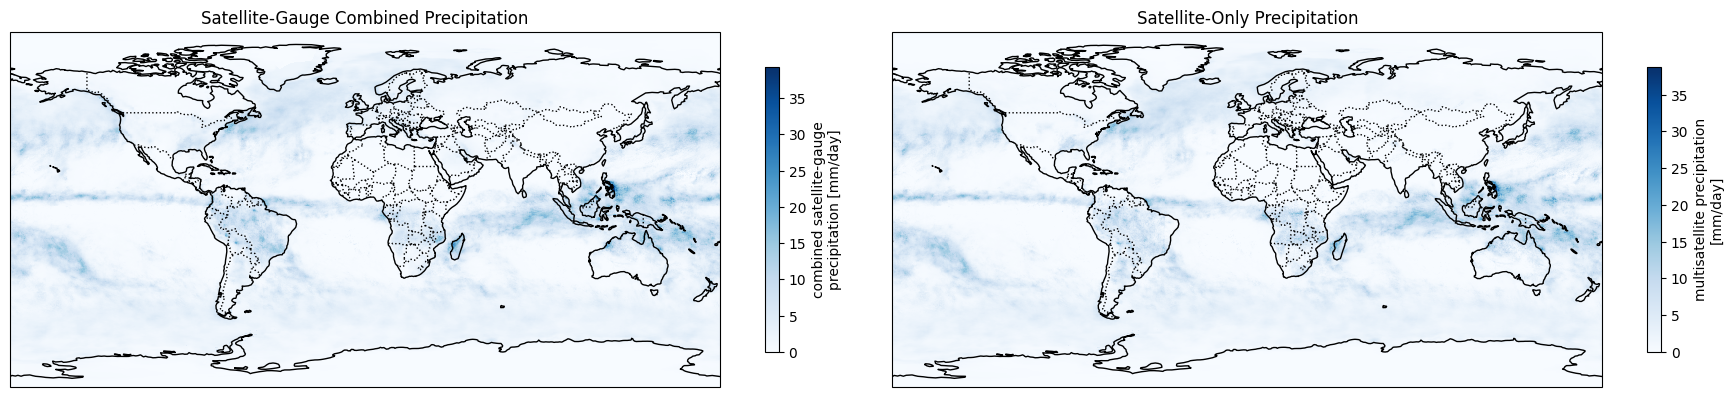

In [50]:
# Select variables
sat_gauge_precip = dataset['sat_gauge_precip'].isel(time=0)
satellite_precip = dataset['satellite_precip'].isel(time=0)

# Plotting setup
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot Satellite-Gauge Combined Precipitation
sat_gauge_precip.plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='Blues', cbar_kwargs={'shrink': 0.5})
ax1.coastlines()
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.set_title('Satellite-Gauge Combined Precipitation')

# Plot Satellite-Only Precipitation
satellite_precip.plot(ax=ax2, transform=ccrs.PlateCarree(), cmap='Blues', cbar_kwargs={'shrink': 0.5})
ax2.coastlines()
ax2.add_feature(cfeature.BORDERS, linestyle=':')
ax2.set_title('Satellite-Only Precipitation')

plt.tight_layout()
plt.show()

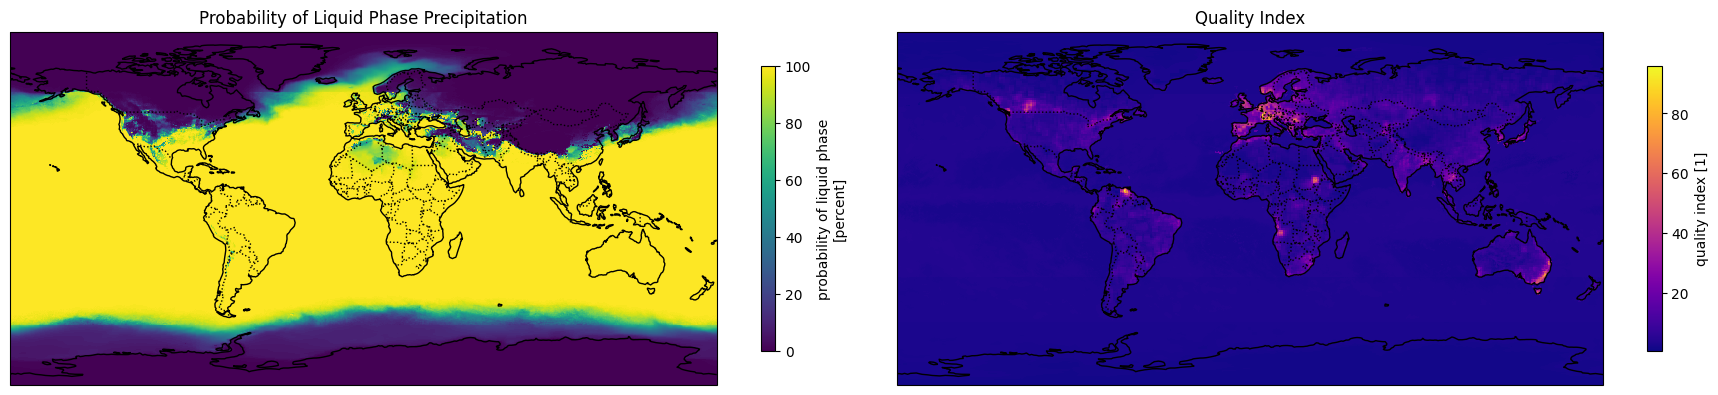

In [51]:
# Select variables
prob_liquid_phase = dataset['probability_liquid_phase'].isel(time=0)
quality_index = dataset['quality_index'].isel(time=0)

# Plotting setup
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot Probability of Liquid Phase
prob_liquid_phase.plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='viridis', cbar_kwargs={'shrink': 0.5})
ax1.coastlines()
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.set_title('Probability of Liquid Phase Precipitation')

# Plot Quality Index
quality_index.plot(ax=ax2, transform=ccrs.PlateCarree(), cmap='plasma', cbar_kwargs={'shrink': 0.5})
ax2.coastlines()
ax2.add_feature(cfeature.BORDERS, linestyle=':')
ax2.set_title('Quality Index')

plt.tight_layout()
plt.show()

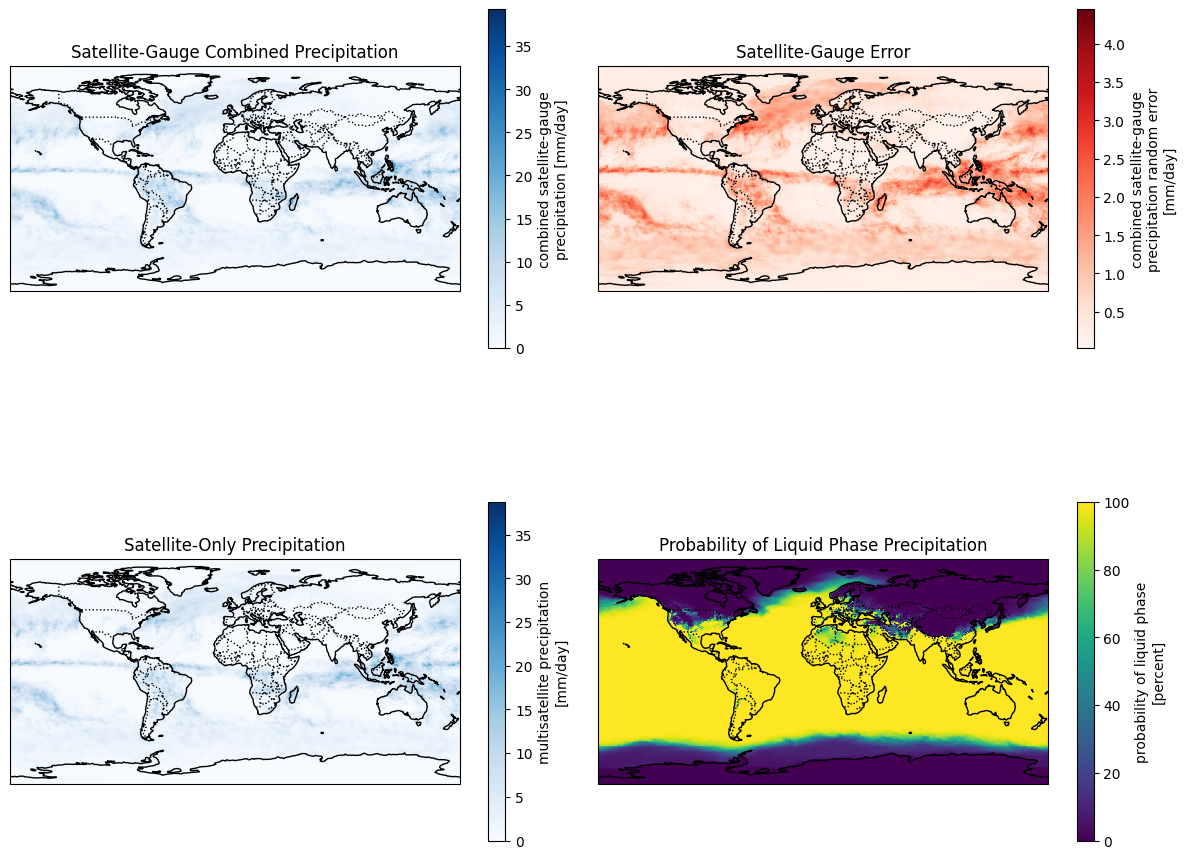

In [52]:
# Select variables
sat_gauge_precip = dataset['sat_gauge_precip'].isel(time=0)
sat_gauge_error = dataset['sat_gauge_error'].isel(time=0)
satellite_precip = dataset['satellite_precip'].isel(time=0)
probability_liquid_phase = dataset['probability_liquid_phase'].isel(time=0)

# Plotting setup
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot Satellite-Gauge Combined Precipitation
sat_gauge_precip.plot(ax=ax1, transform=ccrs.PlateCarree(), cmap='Blues', cbar_kwargs={'shrink': 0.5})
ax1.coastlines()
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.set_title('Satellite-Gauge Combined Precipitation')

# Plot Satellite-Gauge Error
sat_gauge_error.plot(ax=ax2, transform=ccrs.PlateCarree(), cmap='Reds', cbar_kwargs={'shrink': 0.5})
ax2.coastlines()
ax2.add_feature(cfeature.BORDERS, linestyle=':')
ax2.set_title('Satellite-Gauge Error')

# Plot Satellite-Only Precipitation
satellite_precip.plot(ax=ax3, transform=ccrs.PlateCarree(), cmap='Blues', cbar_kwargs={'shrink': 0.5})
ax3.coastlines()
ax3.add_feature(cfeature.BORDERS, linestyle=':')
ax3.set_title('Satellite-Only Precipitation')

# Plot Probability of Liquid Phase
probability_liquid_phase.plot(ax=ax4, transform=ccrs.PlateCarree(), cmap='viridis', cbar_kwargs={'shrink': 0.5})
ax4.coastlines()
ax4.add_feature(cfeature.BORDERS, linestyle=':')
ax4.set_title('Probability of Liquid Phase Precipitation')

plt.tight_layout()
plt.show()


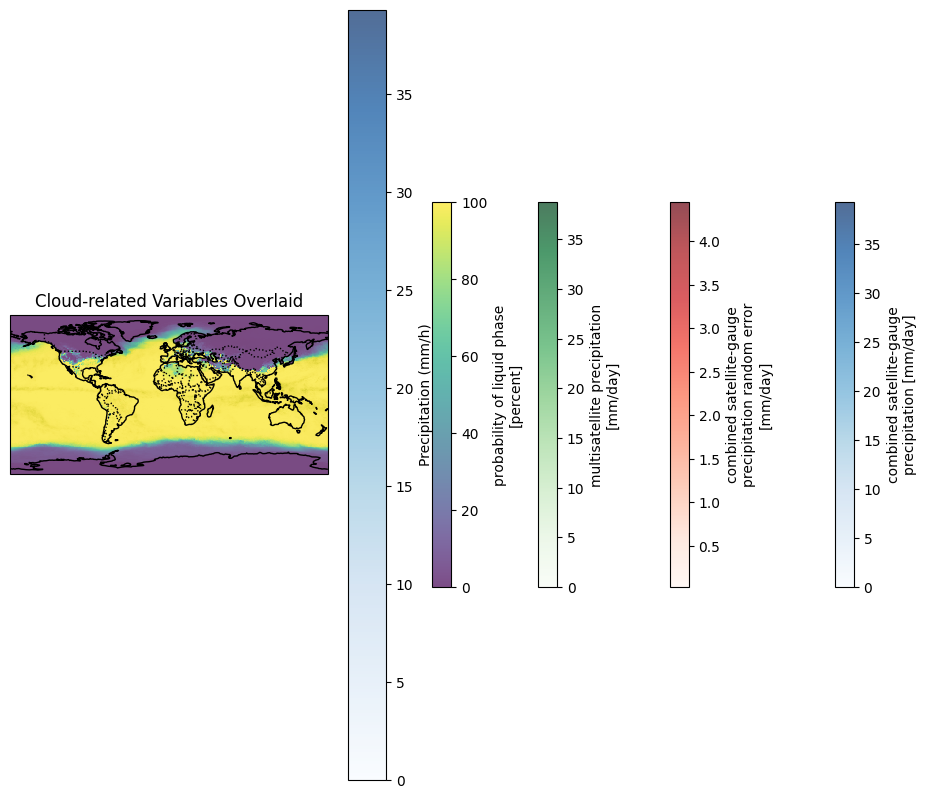

In [53]:
# Plotting setup
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot Satellite-Gauge Combined Precipitation
sat_gauge_precip.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Blues', alpha=0.7, cbar_kwargs={'shrink': 0.5})

# Overlay Satellite-Gauge Error
sat_gauge_error.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds', alpha=0.7, cbar_kwargs={'shrink': 0.5})

# Overlay Satellite-Only Precipitation
satellite_precip.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Greens', alpha=0.7, cbar_kwargs={'shrink': 0.5})

# Overlay Probability of Liquid Phase
probability_liquid_phase.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', alpha=0.7, cbar_kwargs={'shrink': 0.5})

# Add coastlines and borders
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Add titles and colorbars
ax.set_title('Cloud-related Variables Overlaid')
plt.tight_layout()
plt.colorbar(ax.collections[0], ax=ax, orientation='vertical', label='Precipitation (mm/h)')

plt.show()

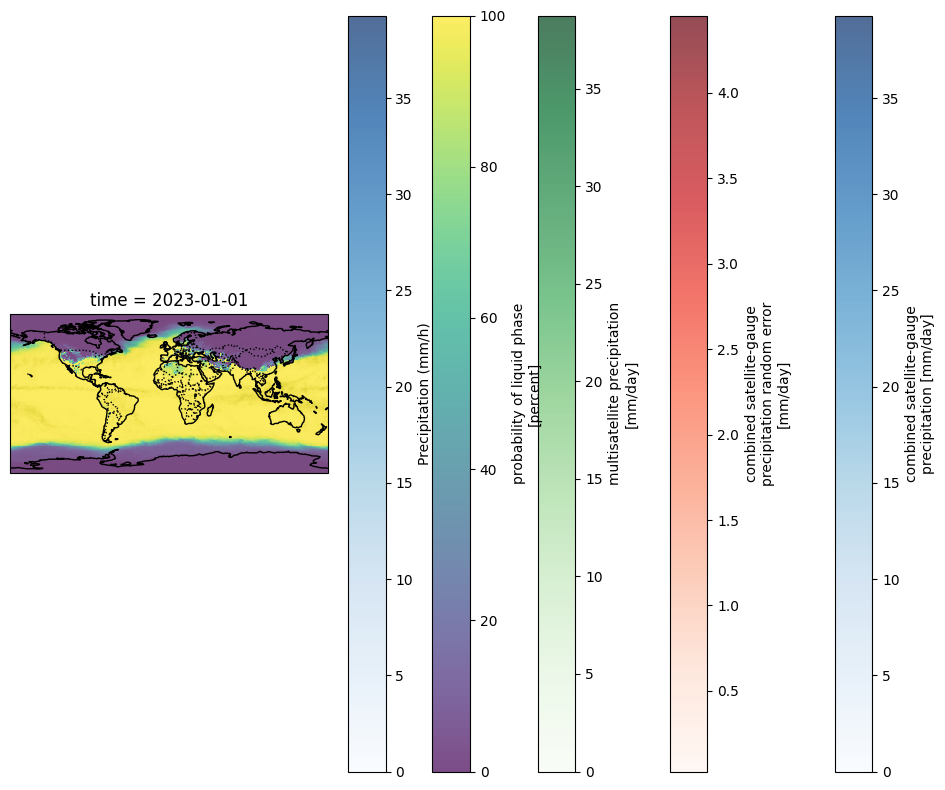

In [54]:
# Select variables
sat_gauge_precip = dataset['sat_gauge_precip'].isel(time=0)
sat_gauge_error = dataset['sat_gauge_error'].isel(time=0)
satellite_precip = dataset['satellite_precip'].isel(time=0)
probability_liquid_phase = dataset['probability_liquid_phase'].isel(time=0)

# Plotting setup
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot Satellite-Gauge Combined Precipitation
sat_gauge_precip.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Blues', alpha=0.7)

# Overlay Satellite-Gauge Error
sat_gauge_error.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds', alpha=0.7)

# Overlay Satellite-Only Precipitation
satellite_precip.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Greens', alpha=0.7)

# Overlay Probability of Liquid Phase
probability_liquid_phase.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', alpha=0.7)

# Add coastlines and borders
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Create a single colorbar for all layers
cbar = plt.colorbar(ax.collections[0], ax=ax, orientation='vertical', label='Precipitation (mm/h)')

plt.tight_layout()
plt.show()

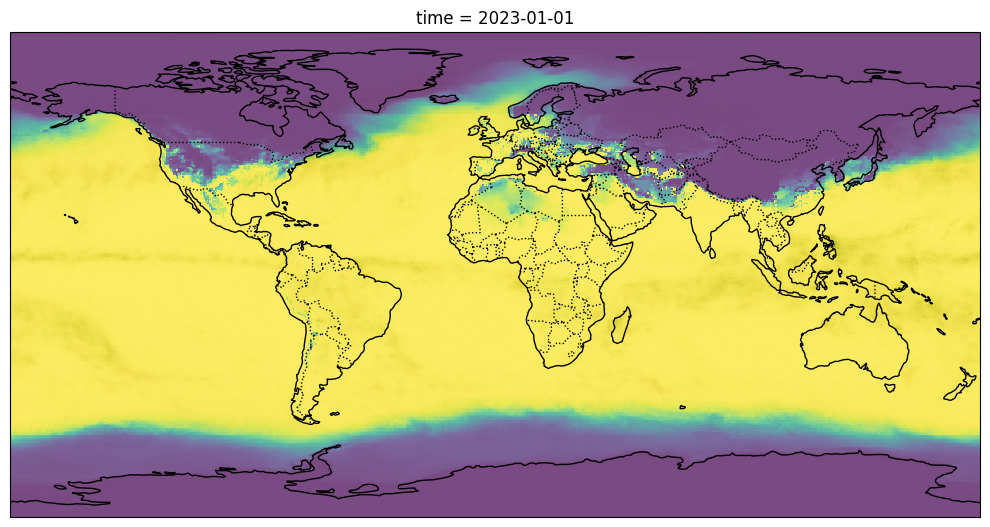

In [58]:
# Select variables
sat_gauge_precip = dataset['sat_gauge_precip'].isel(time=0)
sat_gauge_error = dataset['sat_gauge_error'].isel(time=0)
satellite_precip = dataset['satellite_precip'].isel(time=0)
probability_liquid_phase = dataset['probability_liquid_phase'].isel(time=0)

# Plotting setup
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot Satellite-Gauge Combined Precipitation without color bar
sat_gauge_precip.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Blues', alpha=0.7, add_colorbar=False)

# Overlay Satellite-Gauge Error without color bar
sat_gauge_error.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Reds', alpha=0.7, add_colorbar=False)

# Overlay Satellite-Only Precipitation without color bar
satellite_precip.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Greens', alpha=0.7, add_colorbar=False)

# Overlay Probability of Liquid Phase without color bar
probability_liquid_phase.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', alpha=0.7, add_colorbar=False)

# Add coastlines and borders
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

plt.tight_layout()
plt.show()